In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
import numpy as np
import pandas as pd 

from sklearn import datasets
iris = datasets.load_iris()
X_sepal = iris.data[:, [0, 1]]
X_petal = iris.data[:, [2, 3]]
y = iris.target


In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X_train_sepal, X_test_sepal, y_train_sepal, y_test_sepal = train_test_split(X_sepal, y, test_size = 0.3, random_state = 0)
print("training set number: ", len(X_train_sepal))
print("testging set number: ", len(X_test_sepal))
scaler = StandardScaler()
X_train_sepal = scaler.fit_transform(X_train_sepal)
X_test_sepal = scaler.transform(X_test_sepal)
X_combined_sepal = np.vstack((X_train_sepal, X_test_sepal))
Y_combined_sepal = np.hstack((y_train_sepal, y_test_sepal))

training set number:  105
testging set number:  45


In [20]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(penalty = 'l2', C = 1000)
lr.fit(X_train_sepal, y_train_sepal)
score = lr.score(X_test_sepal, y_test_sepal)
print("correct rate is : {:.2f}%".format(score * 100))

correct rate is : 80.00%


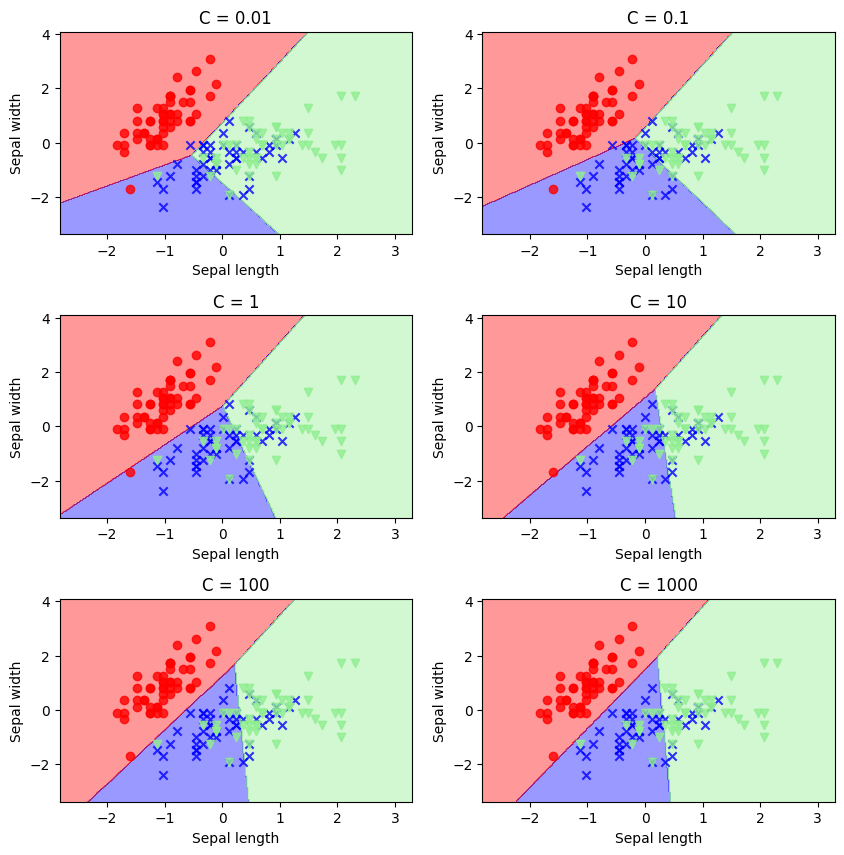

In [16]:
import matplotlib.pyplot as plt  
from matplotlib.colors import ListedColormap 

def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
    markers = ('o', 'x', 'v')
    colors = ('red', 'blue', 'lightgreen')
    color_Map = ListedColormap(colors[:len(np.unique(y))])
    
    x1_min = X[:, 0].min() - 1
    x1_max = X[:, 0].max() + 1
    x2_min = X[:, 1].min() - 1
    x2_max = X[:, 1].max() + 1
    
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=color_Map)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    X_test, y_test = X[test_idx, :], y[test_idx]
    
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, color =color_Map(idx),
                    marker=markers[idx], label=cl)

from sklearn.metrics import accuracy_score  
C_param_range = [0.01, 0.1, 1, 10, 100, 1000]
sepal_acc_table = pd.DataFrame(columns=['C_parameter', 'Accuracy'])

sepal_acc_table['C_parameter'] = C_param_range
plt.figure(figsize=(10, 10))
j = 0
for i in C_param_range:
    lr = LogisticRegression(penalty='l2', C=i, random_state=0)
    lr.fit(X_train_sepal, y_train_sepal)
    y_pred_sepal = lr.predict(X_test_sepal)
    sepal_acc_table.iloc[j, 1] = accuracy_score(y_test_sepal, y_pred_sepal)
    j += 1
    plt.subplot(3, 2, j)
    plt.subplots_adjust(hspace=0.4)
    plot_decision_regions(X=X_combined_sepal, y=Y_combined_sepal,
                          classifier=lr, test_idx=range(0, 150))
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.title('C = %s' % i)
